<a href="https://colab.research.google.com/github/gonza77/PythonProjects/blob/main/Movies_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

In [ ]:
#Esto para importar un archivo csv que está en nuestro computadora
from google.colab import files
uploaded = files.upload()



#df.read_csv("C:\Users\gzflo\OneDrive\Documentos\movies.csv")
#a veces da error unicode y hay que incluir una r ==> df.read_csv(r"C:\Users\gzflo\OneDrive\Documentos\movies.csv")

Saving movies.csv to movies.csv


In [ ]:
# acá para previsualizarlo
print (uploaded['movies.csv'][:200].decode('utf-8') + '...')

budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08...


In [ ]:
# Y lo pasamos a un dataframe ---- aca hubo problema con la lectura, solución en stackoverflow
df = pd.read_csv('movies.csv',encoding='latin-1')
df.head(10)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
5,6000000.0,Hemdale,UK,Oliver Stone,Drama,138530565.0,Platoon,R,1987-02-06,120,8.1,Charlie Sheen,317585,Oliver Stone,1986
6,25000000.0,Henson Associates (HA),UK,Jim Henson,Adventure,12729917.0,Labyrinth,PG,1986-06-27,101,7.4,David Bowie,102879,Dennis Lee,1986
7,6000000.0,De Laurentiis Entertainment Group (DEG),USA,David Lynch,Drama,8551228.0,Blue Velvet,R,1986-10-23,120,7.8,Isabella Rossellini,146768,David Lynch,1986
8,9000000.0,Paramount Pictures,USA,Howard Deutch,Comedy,40471663.0,Pretty in Pink,PG-13,1986-02-28,96,6.8,Molly Ringwald,60565,John Hughes,1986
9,15000000.0,SLM Production Group,USA,David Cronenberg,Drama,40456565.0,The Fly,R,1986-08-15,96,7.5,Jeff Goldblum,129698,George Langelaan,1986


In [ ]:
# Veamos si hay datos que faltan, Nulls

import numpy as np

for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print("{} - {}%".format(col, pct_missing*100))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [ ]:
#Data types of our columns
df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [ ]:
# Quitar el ultimo cero de las columnas budget y gross, no lo necesitamos

df['budget'] = df['budget'].astype('int64') 
df['gross'] = df['gross'].astype('int64') 

In [ ]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [ ]:
# calzar las columnas'released' y 'year', algunas no poseen el mismo año

df['yearcorect'] = df['released'].astype(str).str[:4]
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorect
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalhães,6947,Nicolas Pesce,2016,2016




Para ver todas las filas del dataframe y luego ordernar por gross, lo dejamos como comentario ya que pesa mucho y 
 ocupa mucho espacio en la hoja


pd.set_option('display.max_rows', None)

df.sort_values(by = ['gross'], inplace=False, ascending=False)


In [ ]:
df.sort_values(by = ["gross"], inplace=True, ascending = False)


In [ ]:
# Drop any duplicate.Digamos que queremos eliminar los valores de una columna podria ser por ejemplo

# df["company] = df["company"].drop_duplicates().sort_values(ascending=False)    Pero queremos eliminarlos todos, en este caso no hay duplicados

df.drop_duplicates()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorect
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,2015
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,2009
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,1997
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,2015
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter Næss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,2013
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,2012
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,2014
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,1997


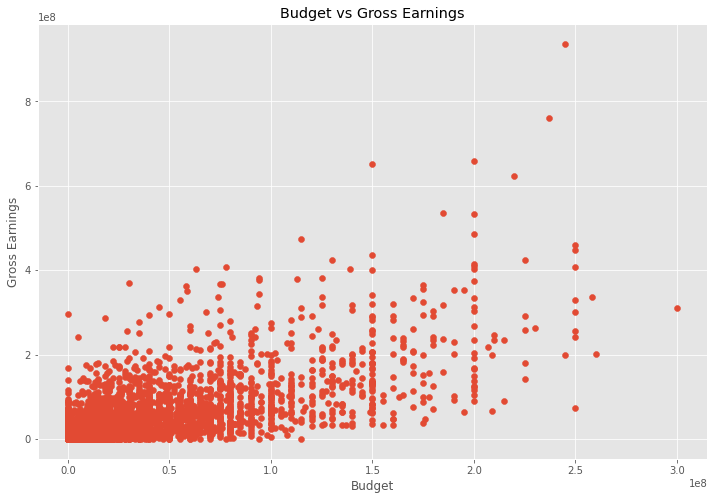

In [ ]:
#Correlación. Suponemos anticipadamente que budget y company tendrán una correlación grande
#Comparemos estas 2 columnas

plt.scatter(x = df['budget'], y=df['gross'])
plt.title("Budget vs Gross Earnings")

plt.xlabel("Budget")
plt.ylabel("Gross Earnings")
plt.show()

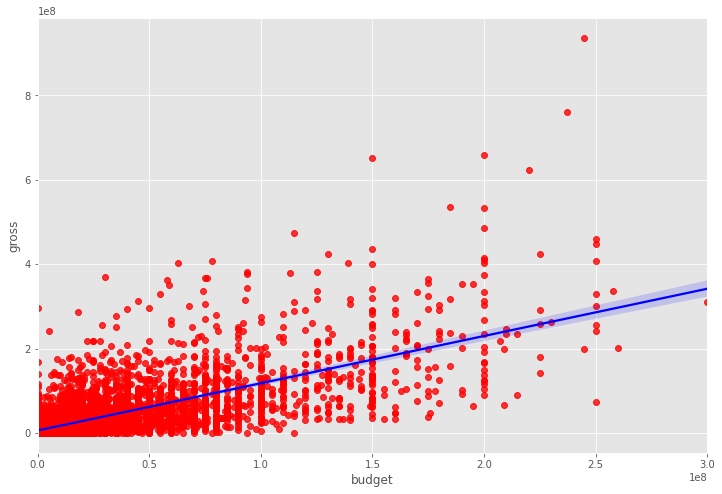

In [ ]:
# regplot or regression plot con seaborn

sns.regplot(x='budget', y='gross', data =df, scatter_kws={'color':'red'}, 
            line_kws={'color':'blue'})



In [ ]:
#Veamos cuanta correlacion hay, solamente funciona con campos numéricos

df.corr()  # esta correlación  por default es 'Pearson'

#correlacion de kendall o spearman:

# df.corr(method="kendall")

# df.corr(method="spearman")


,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


Text(87.0, 0.5, 'Movie Features')

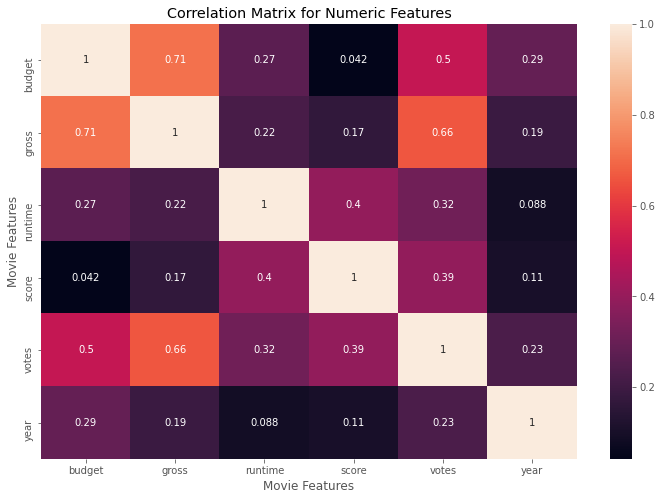

In [ ]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [ ]:
# numerizamos las columnas country, director, company etc para que aparezcan en la matriz

df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == "object"):
    df_numerized[col_name] = df_numerized[col_name].astype("category")
    df_numerized[col_name] = df_numerized[col_name].cat.codes
    

df_numerized

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorect
6380,245000000,1428,54,1037,0,936662225,4679,7,2290,136,8.1,475,687192,2356,2015,29
5061,237000000,2062,53,1066,0,760507625,501,7,1800,162,7.8,2084,954412,1629,2009,23
2420,200000000,2062,54,1066,6,658672302,6177,7,910,194,7.8,1444,862554,1629,1997,11
6391,150000000,2085,54,466,0,652270625,2721,7,2247,124,7.0,404,469200,3310,2015,29
5723,220000000,1491,54,1412,0,623357910,4995,7,1987,143,8.1,2001,1064633,2145,2012,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,2171,35,2071,0,547,2577,8,2059,104,7.2,748,16609,2981,2012,27
5699,0,1262,53,2385,4,542,5204,6,1977,89,6.2,1335,9018,2903,2011,26
6066,0,631,54,2484,5,441,2459,8,2125,106,5.7,1047,21070,2901,2013,28
2594,15000000,764,54,883,4,309,6257,7,895,84,5.7,2459,5034,217,1997,11


Text(87.0, 0.5, 'Movie Features')

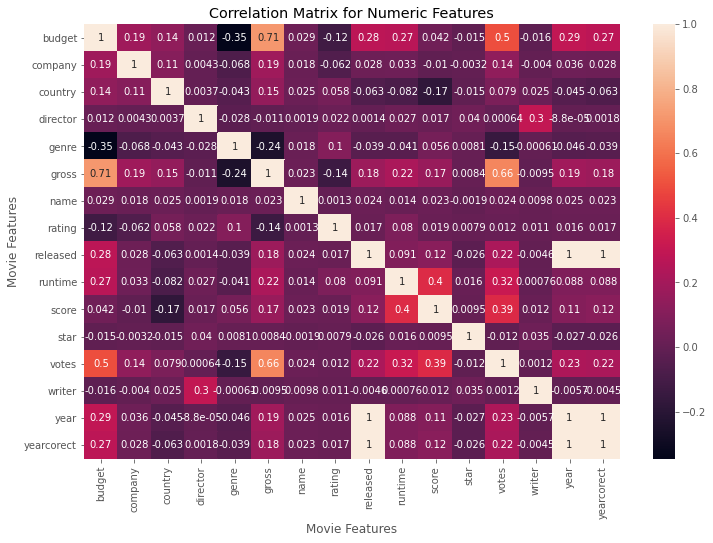

In [ ]:
correlation_matrix = df_numerized.corr()

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation Matrix for Numeric Features")

plt.xlabel("Movie Features")
plt.ylabel("Movie Features")

In [ ]:
df_numerized.corr()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,yearcorect
budget,1.000000,0.187205,0.137635,0.011602,-0.346794,0.712196,0.028712,-0.119660,0.276635,0.268226,0.042145,-0.015061,0.503924,-0.015611,0.291009,0.274820
company,0.187205,1.000000,0.107950,0.004320,-0.068330,0.187220,0.018098,-0.062250,0.027898,0.033058,-0.010426,-0.003160,0.138662,-0.004032,0.036272,0.028012
country,0.137635,0.107950,1.000000,0.003698,-0.042793,0.149988,0.025020,0.057979,-0.062609,-0.081796,-0.174414,-0.014566,0.078657,0.024981,-0.045204,-0.062707
director,0.011602,0.004320,0.003698,1.000000,-0.027668,-0.011429,0.001905,0.021926,0.001440,0.026779,0.017130,0.039813,0.000639,0.298997,-0.000088,0.001822
genre,-0.346794,-0.068330,-0.042793,-0.027668,1.000000,-0.242676,0.018062,0.100960,-0.039179,-0.041357,0.056234,0.008140,-0.150519,-0.000608,-0.046259,-0.039014
gross,0.712196,0.187220,0.149988,-0.011429,-0.242676,1.000000,0.022768,-0.135538,0.178564,0.224579,0.165693,0.008382,0.662457,-0.009455,0.191548,0.176879
name,0.028712,0.018098,0.025020,0.001905,0.018062,0.022768,1.000000,0.001288,0.024120,0.013942,0.023342,-0.001910,0.023665,0.009821,0.024624,0.023411
rating,-0.119660,-0.062250,0.057979,0.021926,0.100960,-0.135538,0.001288,1.000000,0.016696,0.079542,0.019271,0.007893,0.011678,0.010740,0.016221,0.017438
released,0.276635,0.027898,-0.062609,0.001440,-0.039179,0.178564,0.024120,0.016696,1.000000,0.091102,0.119577,-0.025504,0.221736,-0.004635,0.996187,0.999389
runtime,0.268226,0.033058,-0.081796,0.026779,-0.041357,0.224579,0.013942,0.079542,0.091102,1.000000,0.395343,0.016019,0.317399,0.000759,0.087639,0.088342


In [ ]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()
pd.set_option('display.max_rows', None)
corr_pairs

budget      budget        1.000000
            company       0.187205
            country       0.137635
            director      0.011602
            genre        -0.346794
            gross         0.712196
            name          0.028712
            rating       -0.119660
            released      0.276635
            runtime       0.268226
            score         0.042145
            star         -0.015061
            votes         0.503924
            writer       -0.015611
            year          0.291009
            yearcorect    0.274820
company     budget        0.187205
            company       1.000000
            country       0.107950
            director      0.004320
            genre        -0.068330
            gross         0.187220
            name          0.018098
            rating       -0.062250
            released      0.027898
            runtime       0.033058
            score        -0.010426
            star         -0.003160
            votes   

In [ ]:
sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs

yearcorect  yearcorect    1.000000
year        year          1.000000
company     company       1.000000
country     country       1.000000
director    director      1.000000
genre       genre         1.000000
gross       gross         1.000000
name        name          1.000000
rating      rating        1.000000
released    released      1.000000
runtime     runtime       1.000000
score       score         1.000000
star        star          1.000000
votes       votes         1.000000
writer      writer        1.000000
budget      budget        1.000000
released    yearcorect    0.999389
yearcorect  released      0.999389
year        yearcorect    0.996229
yearcorect  year          0.996229
year        released      0.996187
released    year          0.996187
budget      gross         0.712196
gross       budget        0.712196
            votes         0.662457
votes       gross         0.662457
budget      votes         0.503924
votes       budget        0.503924
runtime     score   

In [ ]:
high_corr = sorted_pairs[(sorted_pairs > 0.5)]

high_corr

yearcorect  yearcorect    1.000000
year        year          1.000000
company     company       1.000000
country     country       1.000000
director    director      1.000000
genre       genre         1.000000
gross       gross         1.000000
name        name          1.000000
rating      rating        1.000000
released    released      1.000000
runtime     runtime       1.000000
score       score         1.000000
star        star          1.000000
votes       votes         1.000000
writer      writer        1.000000
budget      budget        1.000000
released    yearcorect    0.999389
yearcorect  released      0.999389
year        yearcorect    0.996229
yearcorect  year          0.996229
year        released      0.996187
released    year          0.996187
budget      gross         0.712196
gross       budget        0.712196
            votes         0.662457
votes       gross         0.662457
budget      votes         0.503924
votes       budget        0.503924
dtype: float64

CONCLUSIÓN : Las correlaciones mas altas las encontramos en budget/gross
 y en votes/gross 